<a href="https://colab.research.google.com/github/keisuke0502watanabe/nmr_glue_bruker_data/blob/main/nmr_glue_coffeee_20250529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nmrglue

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Google driveのマウント
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#3 ファイルリストの取得
import os
#ドライプから読み込む場合
#データファイルの入ったフォルダパスの指定
dir_path='/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'
# filelist=os.listdir(folder_path)
# for i, file in enumerate(filelist):
#     print(f"{i+1}: {file}")

In [ ]:
#4 指定ファイルからデータ読み込み

# #ファイル番号指定
# num=13
# path=os.path.join(folder_path,filelist[num])
# ##ファイルパス指定してデータ読み込み
# df=pd.read_csv(path, header = None, encoding='utf8', sep=',', names=['chemical shift/ ppm', 'Intensity /a.u.'])
# #読み込みデータ確認
# df.head()

In [ ]:
import nmrglue as ng

# Brukerデータの読み込み
# expnoフォルダのパスを指定（例：/opt/data/nmr/exam1/1/pdata/1）
dic, data = ng.bruker.read(dir_path)

# または生データを読み込む場合
dic, data = ng.bruker.read_raw(dir_path)

# パラメータの取得例
sw = dic['acqus']['SW']
sfo1 = dic['acqus']['SFO1']
o1p = dic['acqus']['O1']

AttributeError: module 'nmrglue.fileio.bruker' has no attribute 'read_raw'

In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def read_bruker_data(dir_path):
    """
    Read Bruker NMR data and extract key parameters

    Parameters:
    -----------
    dir_path : str or Path
        Path to the Bruker data directory

    Returns:
    --------
    dict
        Dictionary containing the processed data and parameters
    """
    try:
        # Convert string path to Path object for better handling
        path = Path(dir_path)

        # Try reading processed data first, fall back to raw if necessary
        try:
            dic, data = ng.bruker.read(str(path))
        except Exception as e:
            print(f"Could not read processed data: {e}")
            print("Attempting to read raw data...")
            dic, data = ng.bruker.read_raw(str(path))

        # Extract key parameters
        params = {
            'sweep_width': dic['acqus']['SW'],
            'freq': dic['acqus']['SFO1'],
            'offset': dic['acqus']['O1'],
            'nucleus': dic['acqus'].get('NUC1', None),
            'points': dic['acqus'].get('TD', None),
            'experiment': dic['acqus'].get('PULPROG', None)
        }

        # Calculate chemical shift axis
        udic = ng.bruker.guess_udic(dic, data)
        ppm_scale = ng.bruker.make_uc(dic, data, dim=0)
        ppm = ppm_scale.ppm_scale()

        return {
            'dic': dic,
            'data': data,
            'params': params,
            'ppm': ppm
        }

    except Exception as e:
        raise Exception(f"Error reading NMR data: {e}")

def plot_spectrum(nmr_data, title=None):
    """
    Plot the NMR spectrum

    Parameters:
    -----------
    nmr_data : dict
        Dictionary containing NMR data from read_bruker_data
    title : str, optional
        Title for the plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(nmr_data['ppm'], np.real(nmr_data['data']))
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    if title:
        plt.title(title)
    plt.grid(True)
    plt.gca().invert_xaxis()  # Conventional NMR format
    plt.show()

# Usage example:
if __name__ == "__main__":
    # Replace with your actual path
    dir_path = "/path/to/nmr/data"

    try:
        nmr_data = read_bruker_data(dir_path)

        # Print parameters
        print("\nNMR Parameters:")
        for key, value in nmr_data['params'].items():
            print(f"{key}: {value}")

        # Plot the spectrum
        plot_spectrum(nmr_data, title=f"NMR Spectrum - {nmr_data['params']['nucleus']}")

    except Exception as e:
        print(f"Error: {e}")

Could not read processed data: directory /path/to/nmr/data does not exist
Attempting to read raw data...
Error: Error reading NMR data: module 'nmrglue.fileio.bruker' has no attribute 'read_raw'


In [ ]:
# Additional useful parameters
ns = dic['acqus'].get('NS', None)  # Number of scans
d1 = dic['acqus'].get('D1', None)  # Relaxation delay
te = dic['acqus'].get('TE', None)  # Temperature

Successfully read the data!

Basic Parameters:
Sweep width: 20.0254193154209 Hz
Frequency: 400.132470966543 MHz
Offset: 2470.96654339884 Hz


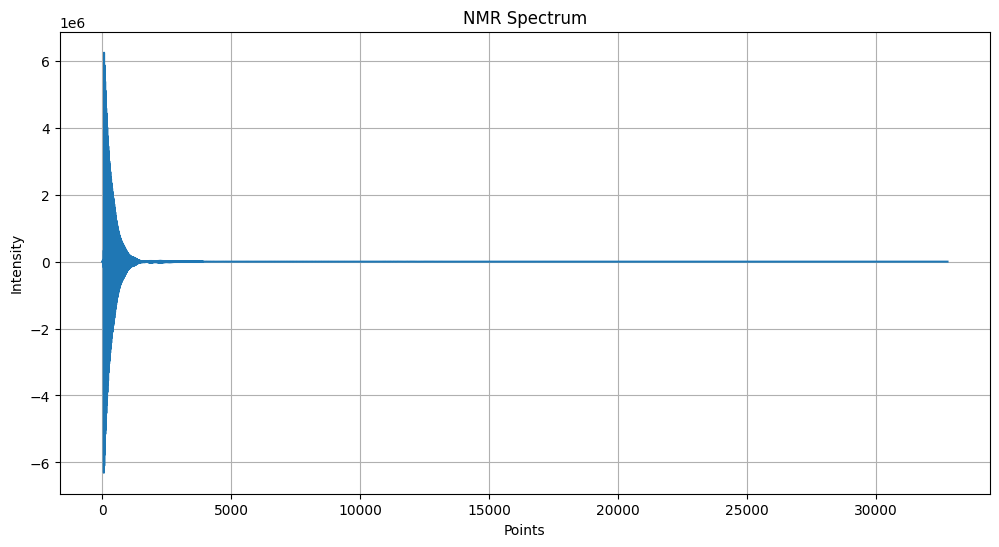

In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# Using your existing path
dir_path = '/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'

# Simple direct read attempt
try:
    # Read the processed data
    dic, data = ng.bruker.read(dir_path)

    # Print some basic parameters
    print("Successfully read the data!")
    print("\nBasic Parameters:")
    print(f"Sweep width: {dic['acqus']['SW']} Hz")
    print(f"Frequency: {dic['acqus']['SFO1']} MHz")
    print(f"Offset: {dic['acqus']['O1']} Hz")

    # Create a simple plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.real(data))
    plt.xlabel('Points')
    plt.ylabel('Intensity')
    plt.title('NMR Spectrum')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error reading data: {e}")
    print("\nDirectory contents:")
    import os
    print(os.listdir(dir_path))

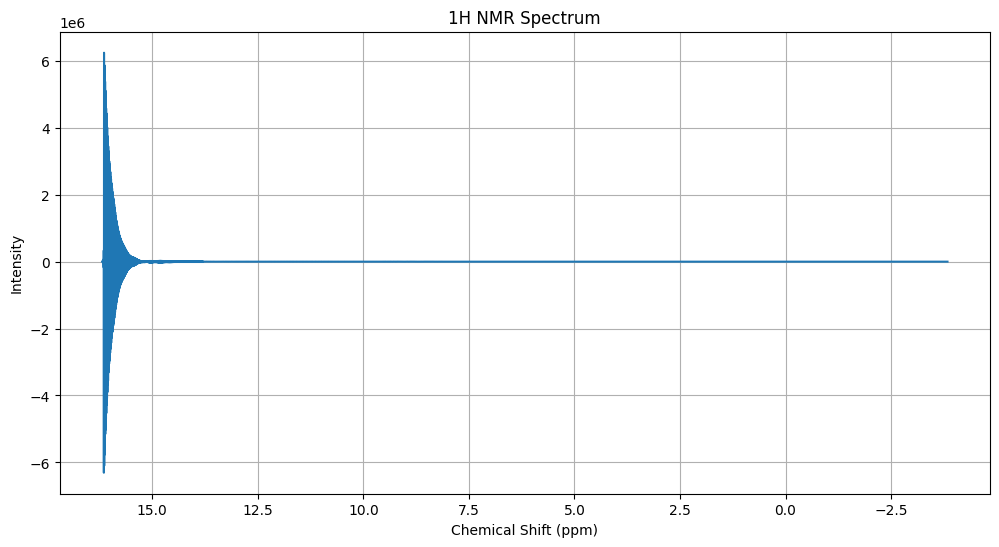


NMRパラメータ:
観測周波数: 400.132470966543 MHz
スペクトル幅: 20.0254193154209 Hz
データポイント数: 65536


In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# データのパス
dir_path = '/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'

try:
    # 処理済みデータの読み込み
    dic, data = ng.bruker.read(dir_path)

    # ケミカルシフト軸の計算
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    ppm = uc.ppm_scale()

    # スペクトルのプロット
    plt.figure(figsize=(12, 6))
    plt.plot(ppm, np.real(data))  # 実部のみをプロット
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    plt.title('1H NMR Spectrum')
    plt.grid(True)
    plt.gca().invert_xaxis()  # ppmスケールを反転（NMRの慣例）
    plt.show()

    # 基本的なパラメータの表示
    print("\nNMRパラメータ:")
    print(f"観測周波数: {dic['acqus']['SFO1']} MHz")
    print(f"スペクトル幅: {dic['acqus']['SW']} Hz")
    print(f"データポイント数: {dic['acqus']['TD']}")

except Exception as e:
    print(f"エラー: {e}")

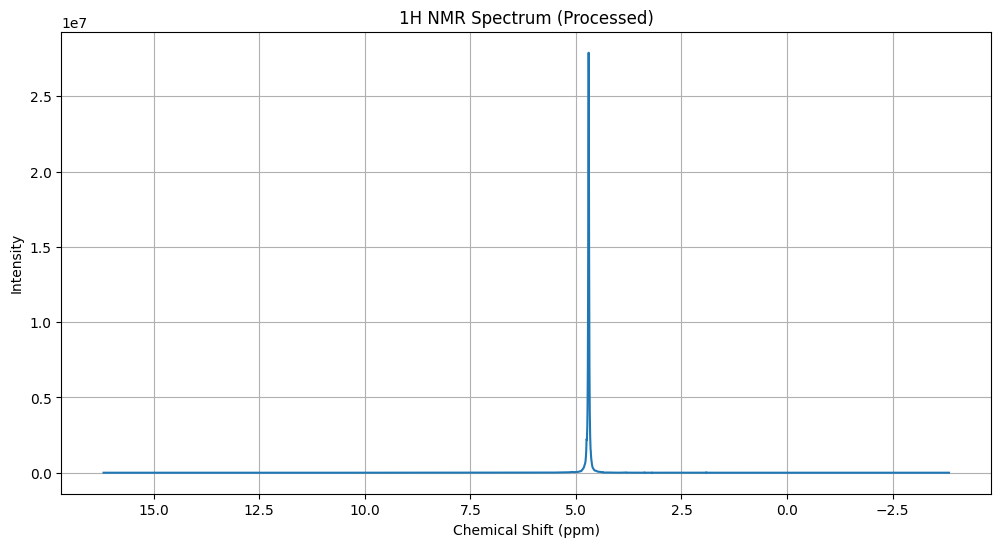


NMRパラメータ:
観測周波数: 400.132470966543 MHz
スペクトル幅: 20.0254193154209 Hz
データポイント数: 65536


In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# 処理済みデータのパス
dir_path = '/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'

try:
    # 処理済みデータの読み込み
    dic, data = ng.bruker.read_pdata(dir_path)

    # ppmスケールの計算
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    ppm = uc.ppm_scale()

    # スペクトルのプロット
    plt.figure(figsize=(12, 6))
    plt.plot(ppm, np.real(data))
    plt.xlabel('Chemical Shift (ppm)')
    plt.ylabel('Intensity')
    plt.title('1H NMR Spectrum (Processed)')
    plt.grid(True)
    plt.gca().invert_xaxis()
    plt.show()

    # パラメータの表示
    print("\nNMRパラメータ:")
    print(f"観測周波数: {dic['acqus']['SFO1']} MHz")
    print(f"スペクトル幅: {dic['acqus']['SW']} Hz")
    print(f"データポイント数: {dic['acqus']['TD']}")

except Exception as e:
    print(f"エラー: {e}")

In [ ]:
import nmrglue as ng
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 処理済みデータのパス
dir_path = '/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'

try:
    # 処理済みデータの読み込み
    dic, data = ng.bruker.read_pdata(dir_path)

    # ppmスケールの計算
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    ppm = uc.ppm_scale()

    # Plotlyでスペクトルを作成
    fig = go.Figure()

    # スペクトルのトレース追加
    fig.add_trace(
        go.Scatter(
            x=ppm,
            y=np.real(data),
            mode='lines',
            name='NMR Spectrum',
            line=dict(color='blue', width=1)
        )
    )

    # レイアウトの設定
    fig.update_layout(
        title='1H NMR Spectrum',
        xaxis=dict(
            title='Chemical Shift (ppm)',
            autorange='reversed',  # ppmスケールを反転
            gridcolor='lightgray',
            showgrid=True
        ),
        yaxis=dict(
            title='Intensity',
            gridcolor='lightgray',
            showgrid=True
        ),
        plot_bgcolor='white',  # プロット背景色
        width=900,  # 図の幅
        height=500,  # 図の高さ
        showlegend=False
    )

    # 図の表示
    fig.show()

    # パラメータの表示
    print("\nNMRパラメータ:")
    print(f"観測周波数: {dic['acqus']['SFO1']} MHz")
    print(f"スペクトル幅: {dic['acqus']['SW']} Hz")
    print(f"データポイント数: {dic['acqus']['TD']}")

except Exception as e:
    print(f"エラー: {e}")


NMRパラメータ:
観測周波数: 400.132470966543 MHz
スペクトル幅: 20.0254193154209 Hz
データポイント数: 65536


In [ ]:
import nmrglue as ng
import numpy as np
import plotly.graph_objects as go

# 処理済みデータのパス
dir_path = '/content/drive/MyDrive/Data/koike/nmr/1015-coffeeE/10/pdata/1'

try:
    # 処理済みデータの読み込み
    dic, data = ng.bruker.read_pdata(dir_path)

    # ppmスケールの計算
    udic = ng.bruker.guess_udic(dic, data)
    uc = ng.fileiobase.uc_from_udic(udic)
    ppm = uc.ppm_scale()

    # スペクトルデータの取得（実部のみ）
    spectrum = np.real(data)

    # ピークピッキング
    peaks = ng.peakpick.pick(
        data=spectrum,
        pthres=0.1*np.max(spectrum),  # 正のピークの最小高さ
        nthres=None,  # 負のピークは検出しない
        algorithm='connected',  # デフォルトのアルゴリズム
        est_params=True,  # ピークのパラメータ推定を行う
        table=True  # 結果をテーブル形式で返す
    )

    # Plotlyでスペクトルを作成
    fig = go.Figure()

    # スペクトルのトレース追加
    fig.add_trace(
        go.Scatter(
            x=ppm,
            y=spectrum,
            mode='lines',
            name='NMR Spectrum',
            line=dict(color='blue', width=1)
        )
    )

    # ピークのマーク追加
    peak_positions = peaks['X_AXIS']  # テーブル形式からX軸の位置を取得
    fig.add_trace(
        go.Scatter(
            x=ppm[peak_positions],
            y=spectrum[peak_positions],
            mode='markers+text',
            name='Peaks',
            text=[f'{ppm[p]:.2f}' for p in peak_positions],
            textposition="top center",
            marker=dict(
                color='red',
                size=8,
                symbol='triangle-down'
            )
        )
    )

    # レイアウトの設定
    fig.update_layout(
        title='1H NMR Spectrum with Peak Picking',
        xaxis=dict(
            title='Chemical Shift (ppm)',
            autorange='reversed',
            gridcolor='lightgray',
            showgrid=True
        ),
        yaxis=dict(
            title='Intensity',
            gridcolor='lightgray',
            showgrid=True
        ),
        plot_bgcolor='white',
        width=900,
        height=500,
        showlegend=True
    )

    # 図の表示
    fig.show()

    # ピーク情報の表示
    print("\nDetected Peaks:")
    for pos, amp in zip(peak_positions, peaks['AMP']):
        print(f"Chemical shift: {ppm[pos]:.2f} ppm, Intensity: {amp:.2e}")

except Exception as e:
    print(f"エラー: {e}")

エラー: arrays used as indices must be of integer (or boolean) type


In [ ]:
import nmrglue as ng
import inspect

# pick()関数のドキュメントを表示
print("Function documentation:")
print(inspect.getdoc(ng.peakpick.pick))

# 関数の引数情報を取得
sig = inspect.signature(ng.peakpick.pick)
print("\nFunction parameters:")
for param_name, param in sig.parameters.items():
    print(f"{param_name}: {param.default if param.default != inspect._empty else 'required'}")

Function documentation:
Pick (find) peaks in a region of a NMR spectrum.

Parameters
----------
data : ndarray
    Region of NMR spectrum to pick peaks from.
pthres : float
    Minimum peak height for positive peaks. None to not detect positive
    peaks.
nthres : float
    Minimum peak height for negative peaks (typically a negative value).
    None to not detect negative peaks.
msep : tuple of ints, optional
    N-tuple of minimum peak separations along each axis. Must be provided
    if algorithm is 'thresh' or 'thresh-fast'.
algorithm : {'thres', thresh-fast', 'downward', 'connected'}, optional
    Peak picking algorithm to use.  Default is 'connected'.
est_params : bool, optional
    True to perform an estimate of linewidths and amplitude for all peaks
    picked.  False, the default, will return only the peak locations.
lineshapes : list, optional
    A list of lineshape classes or string shortcuts for each dimension.
    If not specified Gaussian type lineshapes with a FWHM  lin